<a href="https://colab.research.google.com/github/khatriprajwol/MRI-and-Data/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
 # !pip install tensorflow as tf

In [90]:
# ! pip list

In [91]:
import tensorflow as tf
import os

In [92]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [93]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [94]:
g_data = '/content/drive/MyDrive/Data'

Remove dodgy images

In [95]:
import cv2
import imghdr

In [96]:
data_dir = g_data

In [97]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [98]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


Load Data

In [99]:
import numpy as np
from matplotlib import pyplot as plt

In [100]:
data = tf.keras.utils.image_dataset_from_directory(g_data)
#

Found 10 files belonging to 2 classes.


In [101]:
data_iterator = data.as_numpy_iterator()

In [102]:
batch = data_iterator.next()

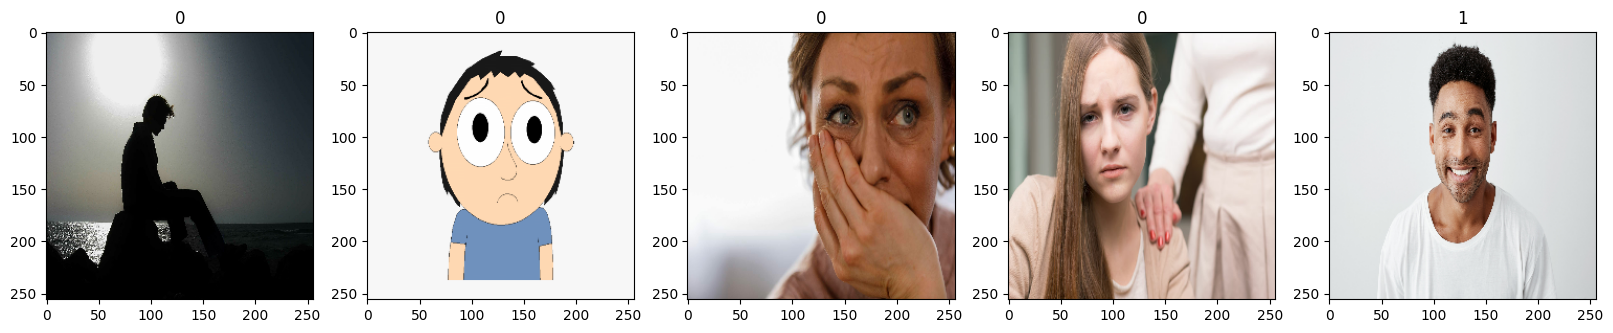

In [105]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


Scale Data

In [106]:
data = data.map(lambda x,y: (x/255,y))

In [107]:
data.as_numpy_iterator().next()

(array([[[[0.83137256, 0.83137256, 0.8269608 ],
          [0.827451  , 0.8352941 , 0.83137256],
          [0.83210784, 0.8384804 , 0.8352941 ],
          ...,
          [0.627451  , 0.6431373 , 0.6392157 ],
          [0.640288  , 0.64543504, 0.6496017 ],
          [0.6218137 , 0.62965685, 0.6257353 ]],
 
         [[0.8231005 , 0.82965684, 0.8263787 ],
          [0.827451  , 0.8352941 , 0.83137256],
          [0.83648896, 0.8443321 , 0.84041053],
          ...,
          [0.63409925, 0.6497855 , 0.64586395],
          [0.6311581 , 0.63900125, 0.6321385 ],
          [0.6277574 , 0.6363664 , 0.6387255 ]],
 
         [[0.827451  , 0.8352941 , 0.83137256],
          [0.83137256, 0.8392157 , 0.8352941 ],
          [0.83556986, 0.843413  , 0.8394914 ],
          ...,
          [0.60882354, 0.61519605, 0.6120098 ],
          [0.5632659 , 0.5563419 , 0.5622549 ],
          [0.6246017 , 0.6326593 , 0.6332414 ]],
 
         ...,
 
         [[0.519761  , 0.7452819 , 0.658364  ],
          [0.48333

Split data

In [108]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [111]:
train_size

0

In [112]:
val_size

0

In [113]:
test_size

0